binanin teze yoxsa kohne tikili olmasini nezere almaq ucun kod 

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

pd.set_option("display.max_columns", None)


In [16]:
df = pd.read_csv("../data/raw/bina_rent.csv")
df.head()


,rooms,area_m2,floor_current,floor_total,location,price
0,4,105,9,17,"Elan №5746764 - Xırdalan, Xırdalan, 4 otaqlı, ...",580
1,1,50,17,17,"Elan №5752792 - Bakı, 20 Yanvar m., 1 otaqlı, ...",549
2,3,80,3,5,"Elan №5753561 - Bakı, Gənclik m., 3 otaqlı, 80...",699
3,2,50,1,2,"Elan №5754424 - Bakı, Nizami m., 2 otaqlı, 50 ...",800
4,3,90,9,12,"Elan №5754425 - Bakı, Koroğlu m., 3 otaqlı, 90...",750


In [19]:

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rooms          3500 non-null   int64 
 1   area_m2        3500 non-null   int64 
 2   floor_current  3500 non-null   int64 
 3   floor_total    3500 non-null   int64 
 4   location       3500 non-null   object
 5   price          3500 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 164.2+ KB


(3500, 6)

In [ ]:
# Split location by ' - ' to remove elan nömrəsi
df['location_clean'] = df['location'].apply(lambda x: x.split(' - ')[-1])

# Split by comma
df[['city', 'district']] = df['location_clean'].str.split(',', n=1, expand=True)

# Strip spaces
df['city'] = df['city'].str.strip()
df['district'] = df['district'].str.strip()

# Nəticəni yoxla
df[['location', 'city', 'district']].head(10)


,location,city,district
0,"Elan №5746764 - Xırdalan, Xırdalan, 4 otaqlı, ...",Xırdalan,"Xırdalan, 4 otaqlı, 105 m², 9/17 mərtəbə"
1,"Elan №5752792 - Bakı, 20 Yanvar m., 1 otaqlı, ...",Bakı,"20 Yanvar m., 1 otaqlı, 50 m², 17/17 mərtəbə"
2,"Elan №5753561 - Bakı, Gənclik m., 3 otaqlı, 80...",Bakı,"Gənclik m., 3 otaqlı, 80 m², 3/5 mərtəbə"
3,"Elan №5754424 - Bakı, Nizami m., 2 otaqlı, 50 ...",Bakı,"Nizami m., 2 otaqlı, 50 m², 1/2 mərtəbə"
4,"Elan №5754425 - Bakı, Koroğlu m., 3 otaqlı, 90...",Bakı,"Koroğlu m., 3 otaqlı, 90 m², 9/12 mərtəbə"
5,"Elan №5754423 - Bakı, Neftçilər m., 3 otaqlı, ...",Bakı,"Neftçilər m., 3 otaqlı, 60 m², 7/9 mərtəbə"
6,"Elan №5741506 - Bakı, Əhmədli m., 3 otaqlı, 80...",Bakı,"Əhmədli m., 3 otaqlı, 80 m², 1/2 mərtəbə"
7,"Elan №5749996 - Bakı, 8 Noyabr m., 2 otaqlı, 8...",Bakı,"8 Noyabr m., 2 otaqlı, 85 m², 9/14 mərtəbə"
8,"Elan №5724191 - Bakı, İnşaatçılar m., 2 otaqlı...",Bakı,"İnşaatçılar m., 2 otaqlı, 71 m², 5/16 mərtəbə"
9,"Elan №5754418 - Bakı, Yeni Yasamal q., 2 otaql...",Bakı,"Yeni Yasamal q., 2 otaqlı, 70 m², 2/9 mərtəbə"


In [24]:
df.columns
df.head(3)
df = df.drop(columns=['location', 'location_clean'])
df.columns
df.head(3)

,rooms,area_m2,floor_current,floor_total,price,city,district
0,4,105,9,17,580,Xırdalan,"Xırdalan, 4 otaqlı, 105 m², 9/17 mərtəbə"
1,1,50,17,17,549,Bakı,"20 Yanvar m., 1 otaqlı, 50 m², 17/17 mərtəbə"
2,3,80,3,5,699,Bakı,"Gənclik m., 3 otaqlı, 80 m², 3/5 mərtəbə"


In [25]:
# District sütunundan yalnız rayon/metrostansiya hissəsini götürək (', ' əvvəlinə qədər)
df['district'] = df['district'].apply(lambda x: x.split(',')[0].strip())

# Nəticəni yoxla
df[['city','district']].head(10)


,city,district
0,Xırdalan,Xırdalan
1,Bakı,20 Yanvar m.
2,Bakı,Gənclik m.
3,Bakı,Nizami m.
4,Bakı,Koroğlu m.
5,Bakı,Neftçilər m.
6,Bakı,Əhmədli m.
7,Bakı,8 Noyabr m.
8,Bakı,İnşaatçılar m.
9,Bakı,Yeni Yasamal q.


In [28]:
df.columns
df.head(3)

,rooms,area_m2,floor_current,floor_total,price,city,district
0,4,105,9,17,580,Xırdalan,Xırdalan
1,1,50,17,17,549,Bakı,20 Yanvar m.
2,3,80,3,5,699,Bakı,Gənclik m.


3 cu addim

In [29]:
# Missing values yoxla
df.isnull().sum()


rooms            0
area_m2          0
floor_current    0
floor_total      0
price            0
city             0
district         0
dtype: int64

In [30]:
df.describe()


,rooms,area_m2,floor_current,floor_total,price
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,2.249429,73.443143,7.295429,12.556286,681.323429
std,0.622354,25.477333,4.793970,5.741500,182.606007
min,1.000000,2.000000,1.000000,1.000000,55.000000
25%,2.000000,58.000000,3.000000,7.000000,550.000000
50%,2.000000,70.000000,6.000000,14.000000,700.000000
75%,3.000000,85.000000,10.000000,17.000000,800.000000
max,6.000000,300.000000,23.000000,30.000000,999.000000


Text(0.5, 1.0, 'Price Boxplot — Outlier Check')

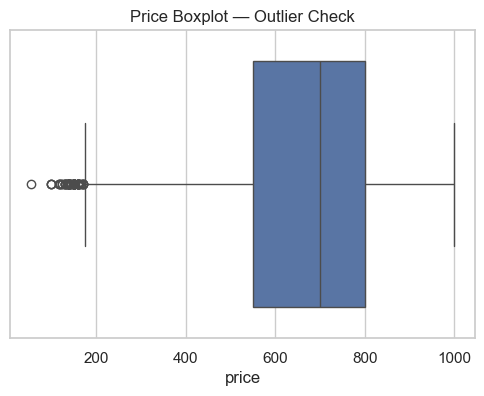

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title("Price Boxplot — Outlier Check")


Text(0.5, 1.0, 'Area Boxplot — Outlier Check')

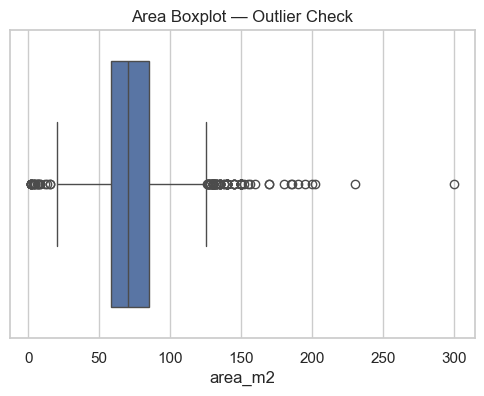

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['area_m2'])
plt.title("Area Boxplot — Outlier Check")


addim 4

In [34]:
# 1️⃣ Price və area_m2 üçün outlier thresholds
min_price = 200
max_price = 1200
min_area = 25
max_area = 250

# 2️⃣ Floor logic check
floor_valid = df['floor_current'] <= df['floor_total']

# 3️⃣ Filter dataset
df_clean = df[
    (df['price'] >= min_price) &
    (df['price'] <= max_price) &
    (df['area_m2'] >= min_area) &
    (df['area_m2'] <= max_area) &
    floor_valid
].copy()

# 4️⃣ Reset index
df_clean.reset_index(drop=True, inplace=True)

# 5️⃣ Dataset shape check
print("Before cleaning:", df.shape)
print("After cleaning:", df_clean.shape)


Before cleaning: (3500, 7)
After cleaning: (3398, 7)


In [ ]:
# Yeni sütun: building_type
df_clean['building_type'] = df_clean['floor_total'].apply(lambda x: 'Teze tikili' if x > 11 else 'Kohne tikili')

# Nəticəni yoxla
df_clean[['floor_total', 'building_type']].head(10)



,floor_total,building_type
0,17,Teze tikili
1,17,Teze tikili
2,5,Kohne tikili
3,2,Kohne tikili
4,12,Teze tikili
5,9,Kohne tikili
6,14,Teze tikili
7,16,Teze tikili
8,9,Kohne tikili
9,5,Kohne tikili


addim5

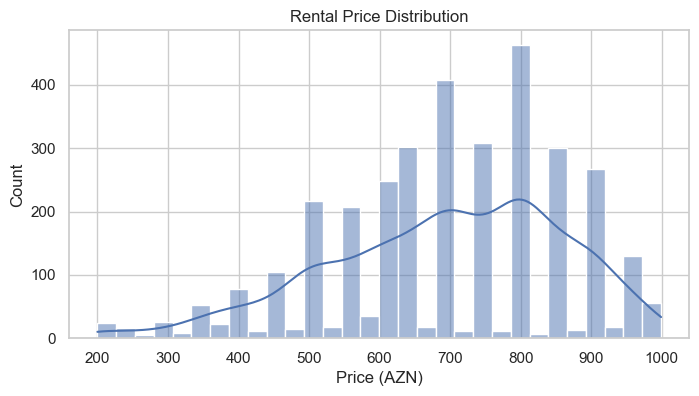

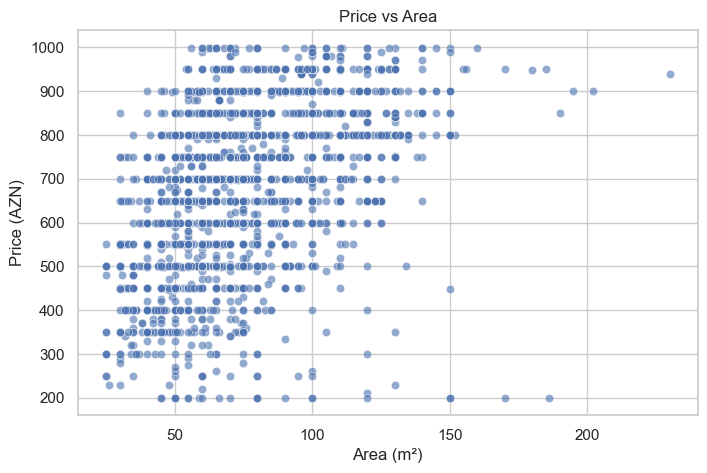

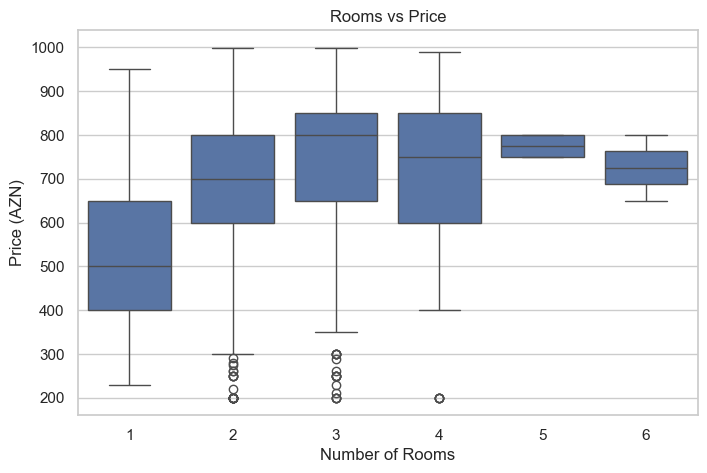

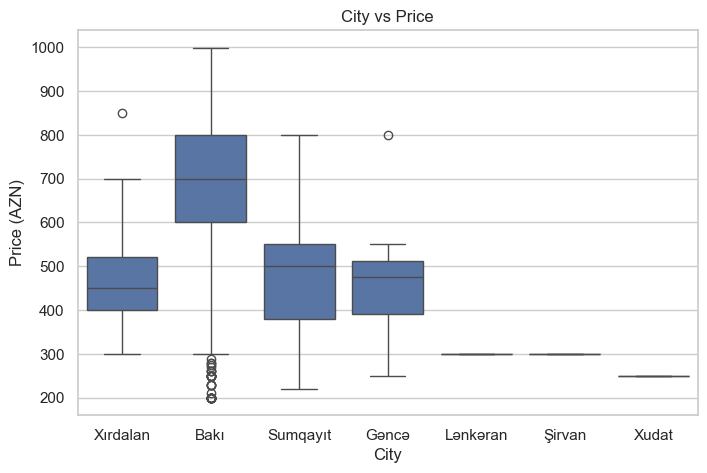

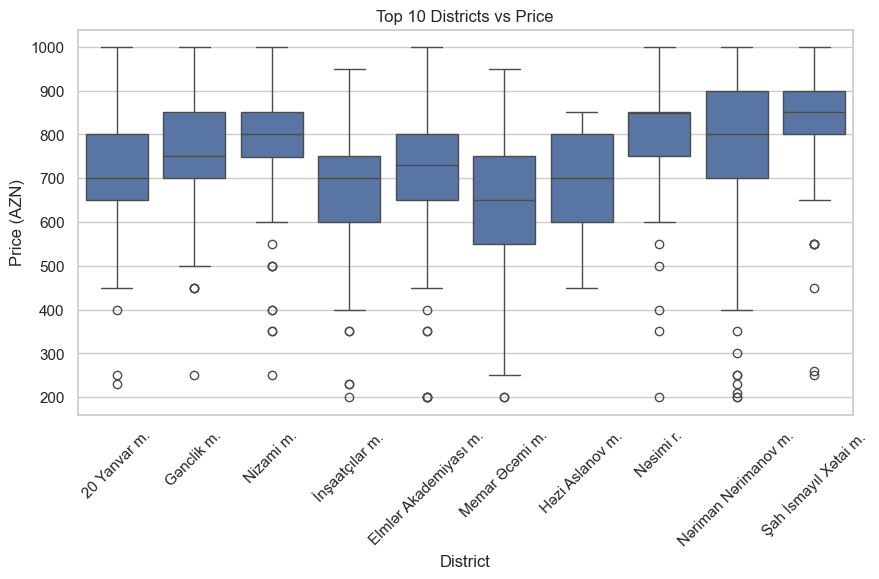

In [37]:
# 1️⃣ Price distribution
plt.figure(figsize=(8,4))
sns.histplot(df_clean['price'], bins=30, kde=True)
plt.title("Rental Price Distribution")
plt.xlabel("Price (AZN)")
plt.ylabel("Count")
plt.show()

# 2️⃣ Price vs Area scatterplot
plt.figure(figsize=(8,5))
sns.scatterplot(x='area_m2', y='price', data=df_clean, alpha=0.6)
plt.title("Price vs Area")
plt.xlabel("Area (m²)")
plt.ylabel("Price (AZN)")
plt.show()

# 3️⃣ Rooms vs Price boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='rooms', y='price', data=df_clean)
plt.title("Rooms vs Price")
plt.xlabel("Number of Rooms")
plt.ylabel("Price (AZN)")
plt.show()

# 4️⃣ City vs Price boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='city', y='price', data=df_clean)
plt.title("City vs Price")
plt.xlabel("City")
plt.ylabel("Price (AZN)")
plt.show()

# 5️⃣ Top 10 Districts by number of listings
top_districts = df_clean['district'].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.boxplot(x='district', y='price', data=df_clean[df_clean['district'].isin(top_districts)])
plt.xticks(rotation=45)
plt.title("Top 10 Districts vs Price")
plt.xlabel("District")
plt.ylabel("Price (AZN)")
plt.show()


addim 6

In [40]:
df_clean.head(3)

,rooms,area_m2,floor_current,floor_total,price,city,district,building_type
0,4,105,9,17,580,Xırdalan,Xırdalan,Teze tikili
1,1,50,17,17,549,Bakı,20 Yanvar m.,Teze tikili
2,3,80,3,5,699,Bakı,Gənclik m.,Kohne tikili


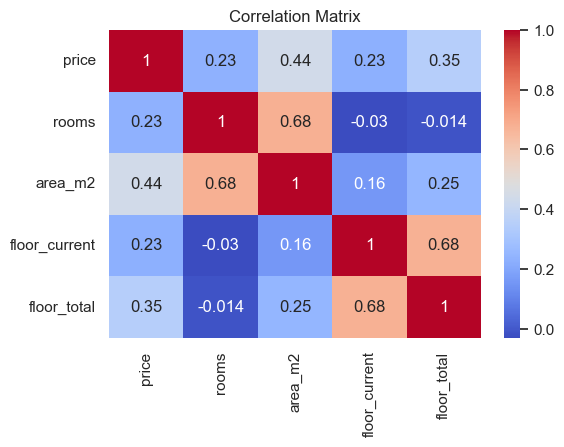

In [38]:
# Correlation matrix
corr = df_clean[['price', 'rooms', 'area_m2', 'floor_current', 'floor_total']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [42]:
# 1️⃣ Numeric & cleaned dataset
df_model = df_clean.copy()

# 2️⃣ Feature Engineering

# Floor ratio
df_model['floor_ratio'] = df_model['floor_current'] / df_model['floor_total']

# Label Encoding for building_type (binary)
df_model['building_type_enc'] = df_model['building_type'].map({'Kohne tikili':0, 'Teze tikili':1})

# One-hot Encoding for city
df_model = pd.get_dummies(df_model, columns=['city'], drop_first=True)

# Optional: Label Encoding for district if çox unikal dəyər varsa
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_model['district_enc'] = le.fit_transform(df_model['district'])

# 3️⃣ Correlation Matrix (numeric + encoded)
corr_cols = ['price', 'rooms', 'area_m2', 'floor_current', 'floor_total', 
             'floor_ratio', 'building_type_enc', 'district_enc'] + [c for c in df_model.columns if c.startswith('city_')]

plt.figure(figsize=(12,8))
sns.heatmap(df_model[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (including encoded categorical features)")
plt.show()

# 4️⃣ Visualization: Price vs Building Type
plt.figure(figsize=(6,4))
sns.boxplot(x='building_type', y='price', data=df_model)
plt.title("Price vs Building Type")
plt.show()

# 5️⃣ Visualization: Price vs City
plt.figure(figsize=(8,4))
sns.boxplot(x='city_Bakı', y='price', data=df_model)
plt.title("Price vs City (example: Bakı)")
plt.show()


ModuleNotFoundError: No module named 'sklearn'